## **Predictive Models**
1. Decision Trees
2. Logistic Regression
3. Neural Network

<author> &copy; Prepared by Oscar Mendoza Cerna

---
## 1. Predictive modeling using Decision Tree

#### 1. Pre-processing dataset 

In [56]:
# Import packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Extend number of columns and rows
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [57]:
# load the dataset
df = pd.read_csv('D3.csv', na_filter=False)

# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   region                  5111 non-null   object 
 1   country                 5111 non-null   object 
 2   sex                     5111 non-null   object 
 3   age                     5111 non-null   object 
 4   height                  5111 non-null   float64
 5   weight                  5111 non-null   int64  
 6   blood_type              5111 non-null   object 
 7   insurance               5111 non-null   object 
 8   income                  5111 non-null   object 
 9   race                    5111 non-null   object 
 10  immigrant               5111 non-null   object 
 11  smoking                 5111 non-null   object 
 12  contacts_count          5111 non-null   float64
 13  house_count             5111 non-null   int64  
 14  public_transport_count  5111 non-null   

Boxplot and density plot for numerical variables


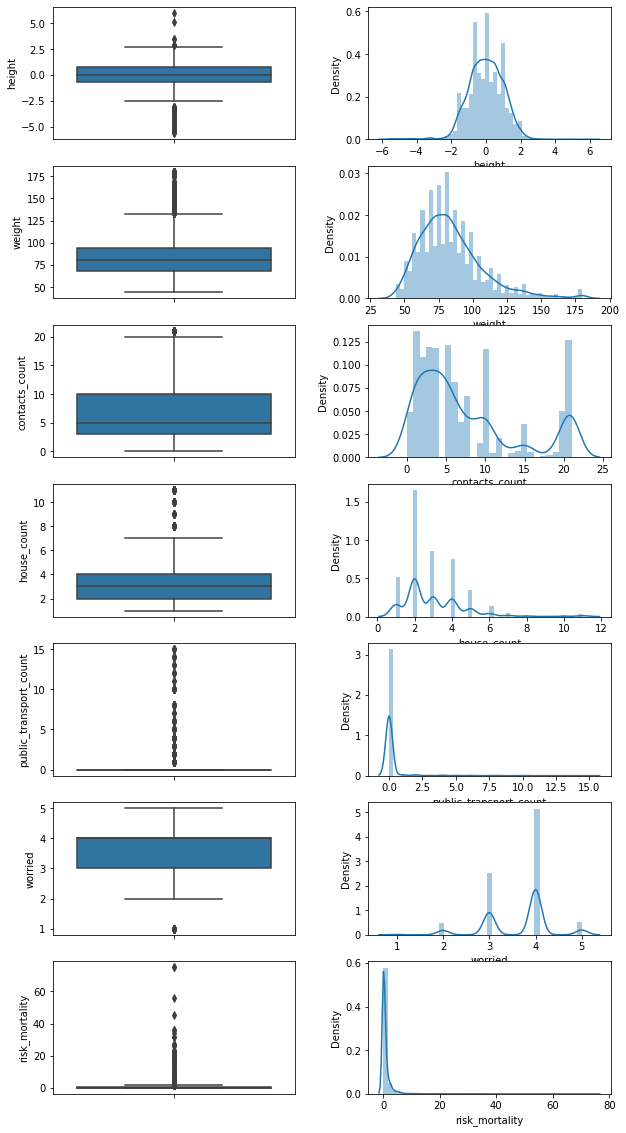

In [58]:
f, axes = plt.subplots(7,2, figsize=(10,20))
plt.subplots_adjust(wspace=0.3) # adjust the space between the plots

print("Boxplot and density plot for numerical variables")
sns.boxplot( y= 'height',  data=df, ax=axes[0,0])
height_plot = sns.distplot(df['height'].dropna(), ax=axes[0,1])
sns.boxplot( y= 'weight',  data=df, ax=axes[1,0])
weight_plot = sns.distplot(df['weight'].dropna(), ax=axes[1,1])
sns.boxplot( y= 'contacts_count',  data=df, ax=axes[2,0])
contacts_count_plot = sns.distplot(df['contacts_count'].dropna(), ax=axes[2,1])
sns.boxplot( y= 'house_count',  data=df, ax=axes[3,0])
house_count_plot = sns.distplot(df['house_count'].dropna(), ax=axes[3,1])
sns.boxplot( y= 'public_transport_count',  data=df, ax=axes[4,0])
public_transport_count_plot = sns.distplot(df['public_transport_count'].dropna(), ax=axes[4,1])
sns.boxplot( y= 'worried',  data=df, ax=axes[5,0])
worried_plot = sns.distplot(df['worried'].dropna(), ax=axes[5,1])
sns.boxplot( y= 'risk_mortality',  data=df, ax=axes[6,0])
mortality_plot = sns.distplot(df['risk_mortality'].dropna(), ax=axes[6,1])

Countplot categorical variables


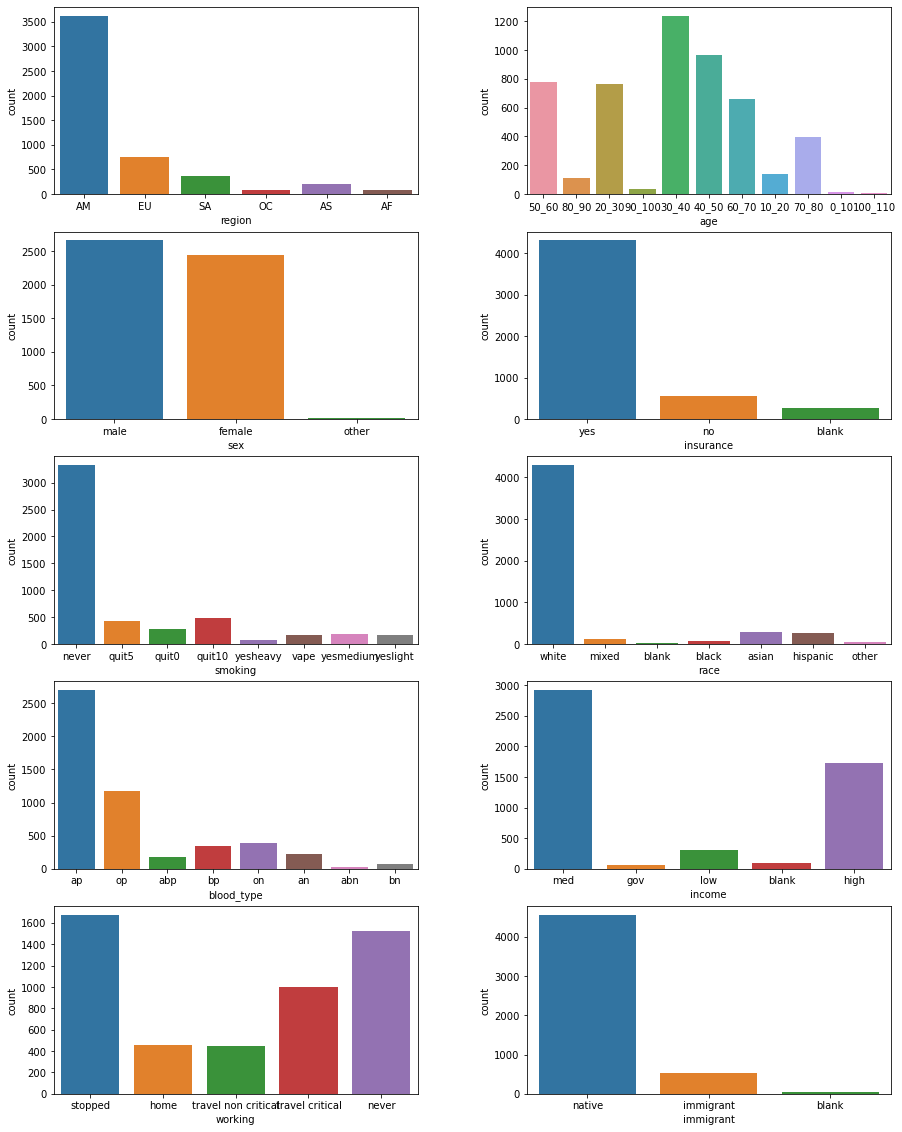

In [59]:
f, axes = plt.subplots(5,2, figsize=(15,20))
plt.subplots_adjust(wspace=0.3) # adjust the space between the plots

print("Countplot categorical variables")
region_plot = sns.countplot(data=df, x='region',ax=axes[0,0])
age_plot = sns.countplot(data=df, x='age',ax=axes[0,1])
gender_plot = sns.countplot(data=df, x='sex',ax=axes[1,0])
insurance_plot = sns.countplot(data=df, x='insurance',ax=axes[1,1])
smoking_plot = sns.countplot(data=df, x='smoking',ax=axes[2,0])
race_plot = sns.countplot(data=df, x='race',ax=axes[2,1])
blood_plot = sns.countplot(data=df, x='blood_type',ax=axes[3,0])
income_plot = sns.countplot(data=df, x='income',ax=axes[3,1])
working_plot = sns.countplot(data=df, x='working',ax=axes[4,0])
immigrant_plot = sns.countplot(data=df, x='immigrant',ax=axes[4,1])

Data cleaning: the exploratory analysis detected the following issues:
- It could be identified ‘blank’ values using column plots in the categorical variables: insurance, race, income, immigrant.
- These ‘blank’ values were converted to empty values (nan) to be then completed with the mode of each variable. The mode was used because these variables were categorical
- The ‘insurance’ variable had two values: ‘yes’ and ‘no’; therefore, it was changed to binary type.

In [60]:
# replace `blank` values with 'nan' value
df.replace({'blank': np.nan}, inplace=True)

# impute 'insurance' using mode
df['insurance'].fillna(df['insurance'].mode()[0], inplace=True)

# impute 'income' using mode
df['income'].fillna(df['income'].mode()[0], inplace=True)

# impute 'race' using mode
df['race'].fillna(df['race'].mode()[0], inplace=True)

# impute 'immigrant' using mode
df['immigrant'].fillna(df['immigrant'].mode()[0], inplace=True)

# change insurance into binary 0/1 variable
insurance_map = {'yes':1, 'no': 0}
df['insurance'] = df['insurance'].map(insurance_map) 

#immigrant_map = {'native':0, 'immigrant': 1}
#df['immigrant'] = df['immigrant'].map(immigrant_map)

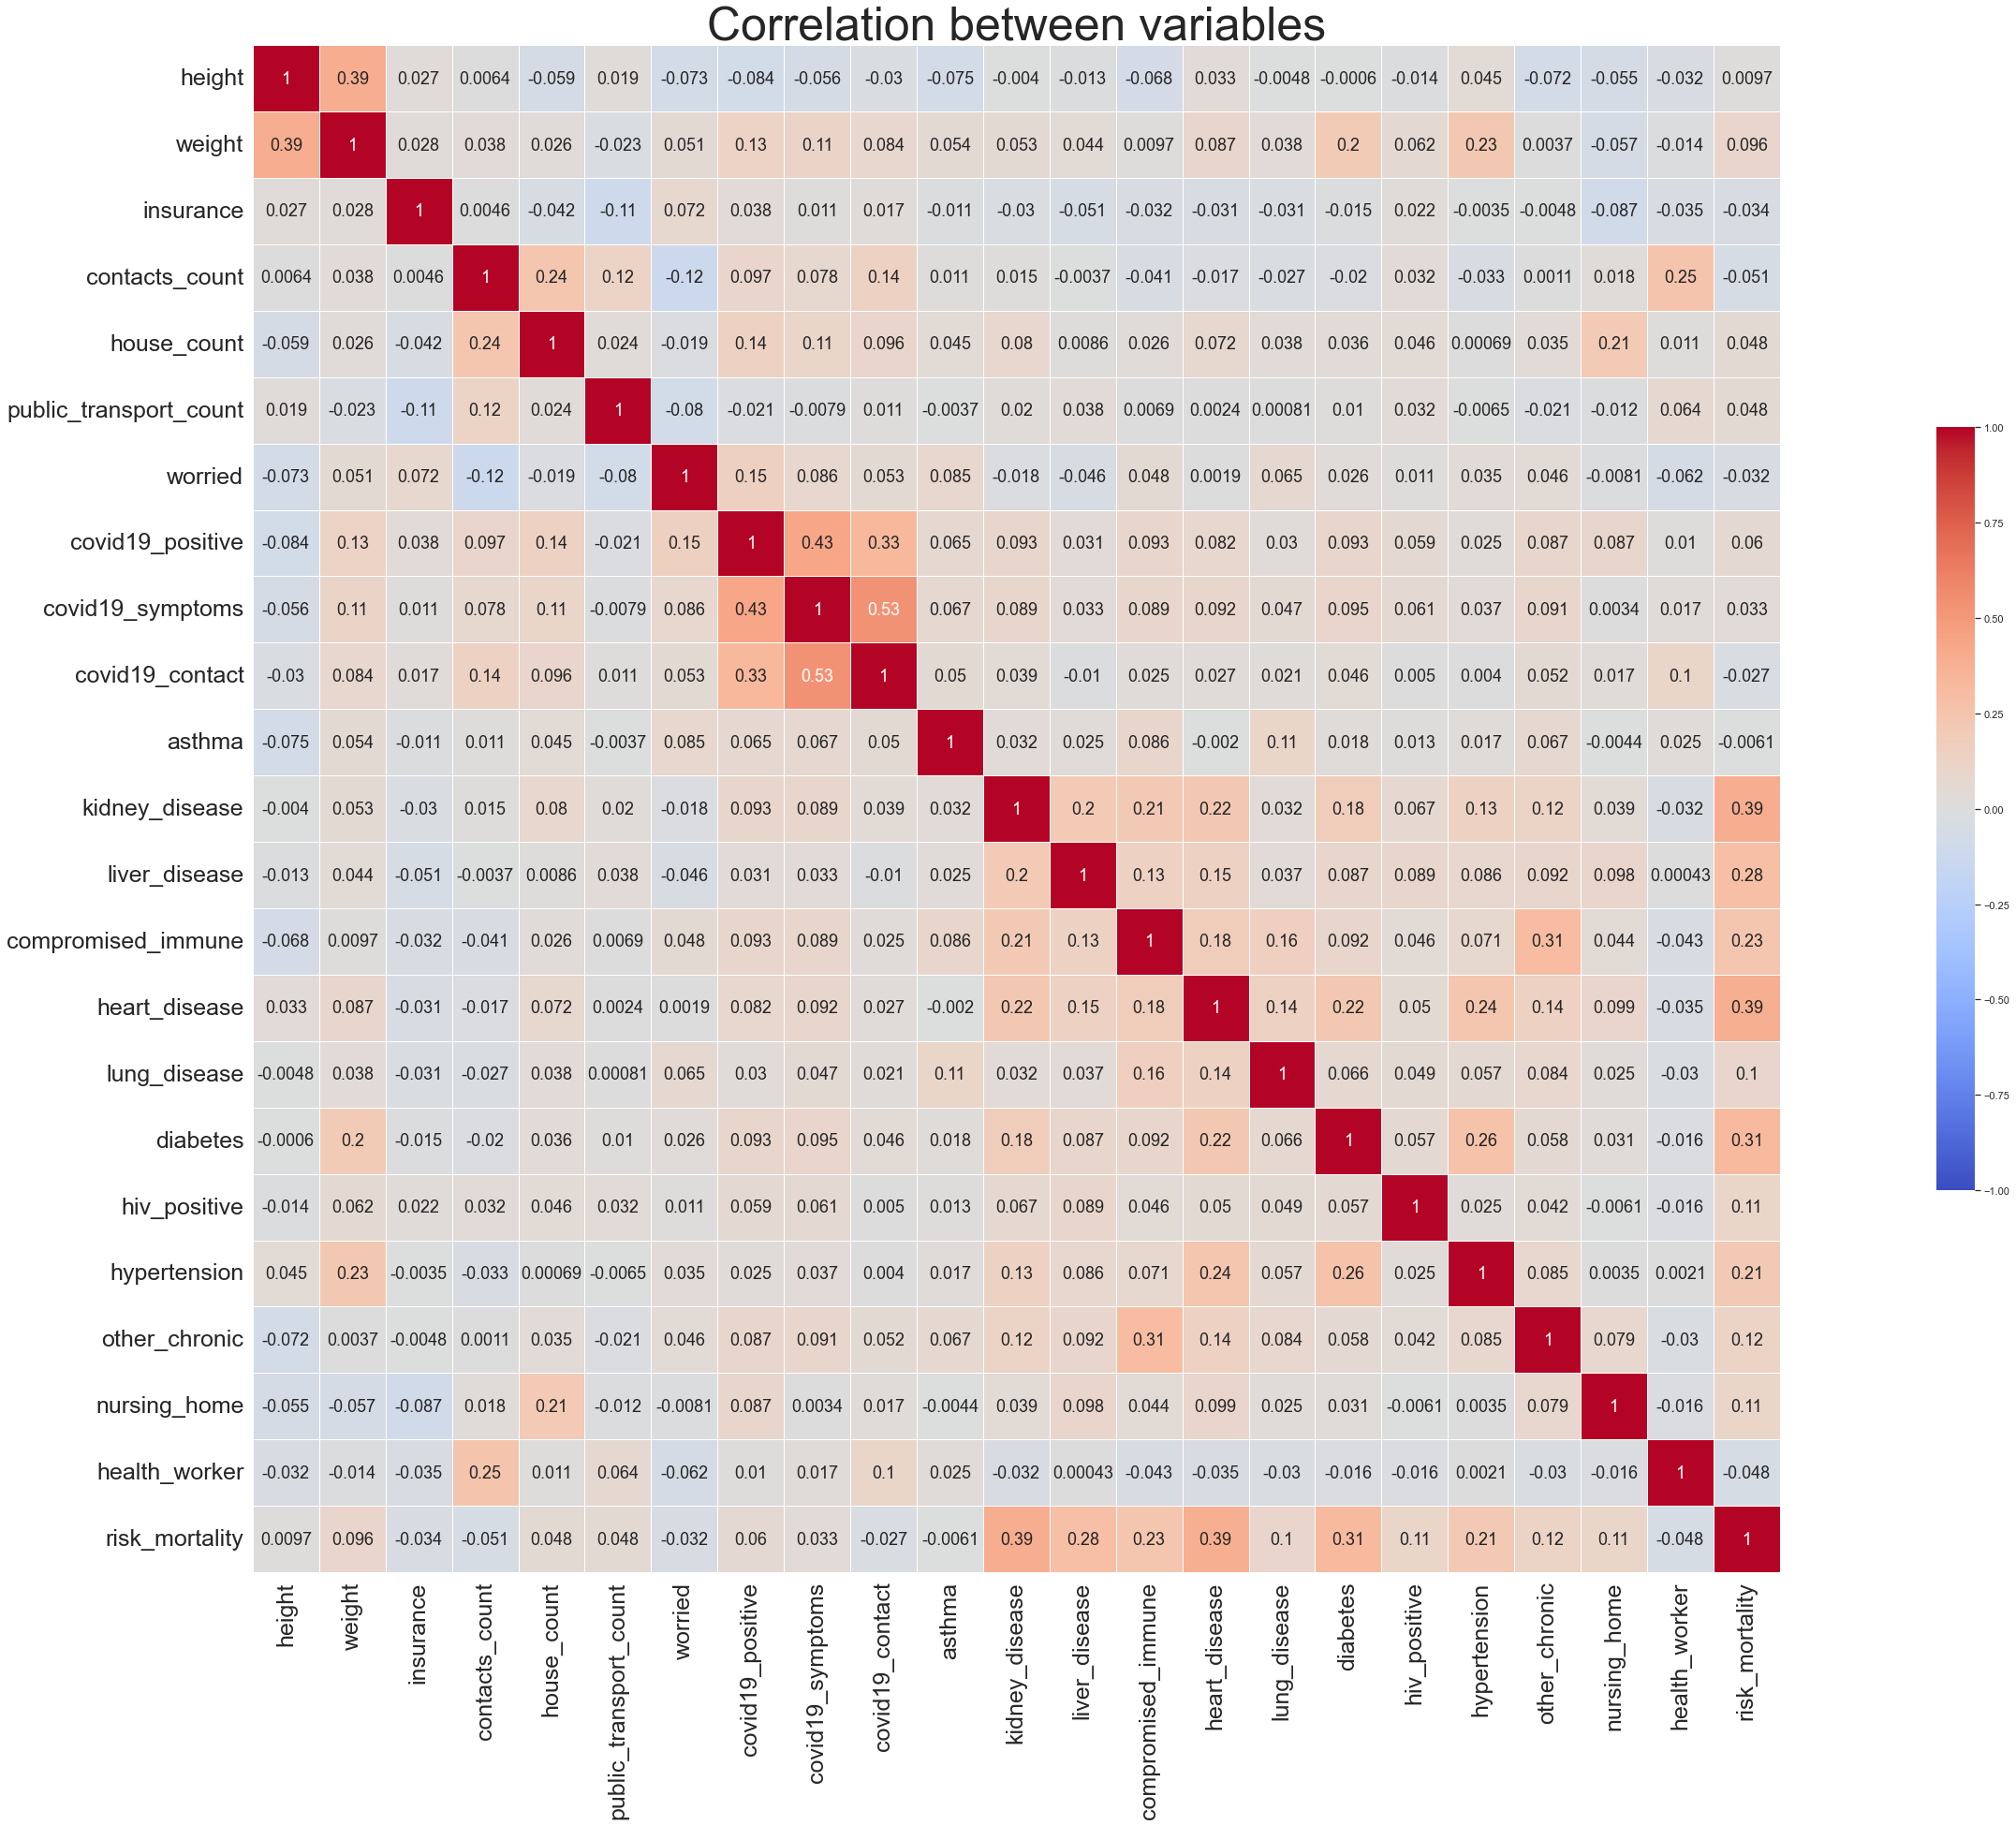

In [61]:
# Correlation: numerical variables
df_numerical = df.select_dtypes(include=[np.number])

# Plot correlation
sns.set(style='white')
corr = df_numerical.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = False

f, ax = plt.subplots(figsize=(60,30))

cmap = sns.diverging_palette(10,220, as_cmap=True)

ax = sns.heatmap(corr, mask=mask,
                 cmap='coolwarm', vmin=-1, vmax= 1, annot=True, annot_kws= {'size':18},
                 square=True, linewidths=1,
                 cbar_kws={'shrink': .5}, ax=ax)

ax.set_title('Correlation between variables', fontsize=50)
ax.set_xticklabels(corr.columns, fontsize=25)
ax.set_yticklabels(corr.columns, fontsize=25);

##### Correlation between `covid19_positive` and categorical variables|

In [62]:
df.head(5)

,region,country,sex,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,contacts_count,house_count,public_transport_count,working,worried,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_mortality
0,AM,US,male,50_60,1.100095,80,ap,1,med,white,native,never,7.541757,5,0,stopped,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.194
1,EU,NL,female,80_90,-0.720514,84,ap,1,med,white,native,never,7.541757,1,0,stopped,4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.483
2,SA,BR,female,20_30,-0.174331,64,ap,1,med,white,native,never,10.000000,1,0,stopped,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.050
3,EU,CH,male,90_100,-3.633488,124,op,1,med,white,native,quit5,7.541757,10,0,stopped,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13.973
4,AM,US,male,30_40,1.100095,118,op,1,med,white,native,never,7.541757,3,0,stopped,4,1,1,1,1,0,0,0,0,0,1,0,1,1,0,0,0.116


In [63]:
print(df.groupby(['covid19_positive'])['sex'].value_counts(normalize=True))

covid19_positive  sex   
0                 male      0.544276
                  female    0.454489
                  other     0.001234
1                 female    0.517647
                  male      0.478075
                  other     0.004278
Name: sex, dtype: float64


In [64]:
print(df.groupby(['covid19_positive'])['age'].value_counts(normalize=True))

covid19_positive  age    
0                 30_40      0.217834
                  40_50      0.196853
                  50_60      0.161061
                  60_70      0.159210
                  20_30      0.124653
                  70_80      0.094724
                  10_20      0.025301
                  80_90      0.016353
                  0_10       0.002160
                  90_100     0.001851
1                 30_40      0.285027
                  20_30      0.193048
                  40_50      0.175936
                  50_60      0.137968
                  60_70      0.077005
                  70_80      0.047059
                  80_90      0.032620
                  10_20      0.028877
                  90_100     0.017112
                  0_10       0.002674
                  100_110    0.002674
Name: age, dtype: float64


In [65]:
print(df.groupby(['covid19_positive'])['blood_type'].value_counts(normalize=True))

covid19_positive  blood_type
0                 ap            0.522370
                  op            0.232336
                  on            0.075902
                  bp            0.070040
                  an            0.043197
                  abp           0.032089
                  bn            0.015736
                  abn           0.008331
1                 ap            0.534759
                  op            0.223529
                  on            0.073797
                  bp            0.065241
                  an            0.045455
                  abp           0.039037
                  bn            0.013904
                  abn           0.004278
Name: blood_type, dtype: float64


In [66]:
print(df.groupby(['covid19_positive'])['race'].value_counts(normalize=True))

covid19_positive  race    
0                 white       0.825363
                  asian       0.067880
                  hispanic    0.056156
                  mixed       0.024375
                  black       0.015119
                  other       0.011108
1                 white       0.874866
                  hispanic    0.043850
                  asian       0.039572
                  mixed       0.022460
                  black       0.012299
                  other       0.006952
Name: race, dtype: float64


In [67]:
print(df.groupby(['covid19_positive'])['immigrant'].value_counts(normalize=True))

covid19_positive  immigrant
0                 native       0.867942
                  immigrant    0.132058
1                 native       0.949733
                  immigrant    0.050267
Name: immigrant, dtype: float64


In [68]:
print(df.groupby(['covid19_positive'])['smoking'].value_counts(normalize=True))

covid19_positive  smoking  
0                 never        0.678494
                  quit5        0.091638
                  quit10       0.087010
                  quit0        0.041345
                  yeslight     0.031472
                  yesmedium    0.031472
                  vape         0.028695
                  yesheavy     0.009873
1                 never        0.601070
                  quit10       0.104813
                  quit0        0.072727
                  quit5        0.070053
                  yesmedium    0.048128
                  vape         0.042781
                  yeslight     0.039037
                  yesheavy     0.021390
Name: smoking, dtype: float64


In [69]:
print(df.groupby(['covid19_positive'])['working'].value_counts(normalize=True))

covid19_positive  working            
0                 never                  0.329528
                  stopped                0.325825
                  travel critical        0.132984
                  home                   0.106449
                  travel non critical    0.105214
1                 stopped                0.328877
                  travel critical        0.305348
                  never                  0.245989
                  home                   0.060428
                  travel non critical    0.059358
Name: working, dtype: float64


#### 1.2. Data selection

Data selection: it was performed three criterions:
1. Correlation matrix between covid19_positive and numerical variables were done. It was identified the variables with a correlation of greater and equal than 0.3. The result showed only two variables, demonstrating that the correlation with other variables would be lower. Therefore, it was decided to consider variables with a correlation of greater than and equal to 0.05 in order to obtain a sufficient input of independent variables.

2. Correlation between covid19_positive and categorical variables was carried out according to the distribution of values by each variable. The change of distribution for each variable, allowed us to assume that some variables could has a correlation with positive Covid 19. For example, the ‘sex’ variable showed that while female had a proportion of 0.45 negative covid, they increased this proportion to 0.51 in positive Covid 19, overtaking the distribution of ‘male’ positive Covid 19. Another example is the variable immigrant, who showed an increase of proportion from negative Covid with 0.86 to positive Covid 19 with 0.94.

3. Unimportant variables: Country and region are geographical variables which does not provide useful input to the objective of predict if a patient will be positive or negative Covid 19. Likewise, the ‘other chronic’ variable it would not be helpful to determine the characteristics of patients after prediction model. Therefore, the previous mentioned variables were deleted.

##### 1.2.1 Dropping Unnecessary Variables

In [70]:
# drop variables
df.drop(['region', 'country', 'public_transport_count', 'liver_disease', 'lung_disease', 'hypertension', 
         'health_worker', 'blood_type', 'region', 'other_chronic', 'insurance'], axis=1, inplace=True)

# one-hot encoding
df1 = pd.get_dummies(df)


print("Number of columns before: ", df.shape[1])
print("Number of columns after: ", df1.shape[1])

Number of columns before:  23
Number of columns after:  55


##### 1.2.2. Variable Role Assignment 

Task: The objective is to classify if a patient is `covid19_positive` (recorded by the value 1) or not (recorded by the value 0).

In [71]:
df = df1
# target/input split
y = df['covid19_positive']
X = df.drop(['covid19_positive'], axis=1)

##### 1.2.3. Data partitioning

In [72]:
from sklearn.model_selection import train_test_split

# setting random state
rs = 10

# Convert features in Matrix
X_mat = X.to_numpy()

# training, validation and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

#### 2. Build a decision tree using the default setting 

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from project_tools import analyse_feature_importance
from project_tools import visualize_decision_tree
from project_tools import analyse_feature_importance_cv

rs = 10
# simple decision tree training
model_dt_df = DecisionTreeClassifier(random_state=rs)
model_dt_df.fit(X_train, y_train)


DecisionTreeClassifier(random_state=10)

In [74]:
# classification report on test data
y_pred = model_dt_df.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       973
           1       0.70      0.71      0.70       561

    accuracy                           0.78      1534
   macro avg       0.76      0.76      0.76      1534
weighted avg       0.78      0.78      0.78      1534



**a. What is the classification accuracy of training and test datasets?**

In [75]:
# accuracy
print("Train accuracy:", model_dt_df.score(X_train, y_train))
print("Test accuracy:", model_dt_df.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.7796610169491526


**b. What is the size of the tree (i.e., number of nodes and rules)?**

In [76]:
from sklearn import tree

max_depth = model_dt_df.tree_.max_depth
n_nodes = model_dt_df.tree_.node_count
n_leaves = model_dt_df.tree_.n_leaves
n_features = model_dt_df.tree_.n_features
min_samples_leaf = model_dt_df.min_samples_leaf

print("max_depth: " + str(max_depth))
print("n_nodes: " + str(n_nodes))
print("n_leaves: " + str(n_leaves))
print("n_features: " + str(n_features))
print("min_samples_leaf: " + str(min_samples_leaf))

max_depth: 29
n_nodes: 1259
n_leaves: 630
n_features: 54
min_samples_leaf: 1


**c. Which variable is used for the first split?**

In [77]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model_dt_df, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dt_viz.png")

In [78]:
# get the text representation
text_representation = tree.export_text(model_dt_df)
print(text_representation)

|--- feature_5 <= 0.50
|   |--- feature_30 <= 0.50
|   |   |--- feature_4 <= 3.50
|   |   |   |--- feature_3 <= 7.50
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- feature_14 <= 5.60
|   |   |   |   |   |   |--- feature_38 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 1.37
|   |   |   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_24 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_21 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- feature_21 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- feature_24 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 75.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  75.00
|   |   |   |   |   |   |   |   |   | 

In [79]:
feature_names = X.columns
feature_names[5]

'covid19_symptoms'

**d. What are the 5 important variables (in order) in building the tree (Feature importance)?**


In [80]:
feature_names = X.columns
n_to_display=5
analyse_feature_importance(model_dt_df, feature_names,n_to_display)

covid19_symptoms : 0.18408023483844368
risk_mortality : 0.09804710630090947
weight : 0.09297099843115379
income_high : 0.08734077729845982
worried : 0.07360148073369256


**e. What parameters have been used in building the tree? Detail them.**

In [81]:
model_dt_df.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

#### 3. Build another decision tree tuned with GridSearchCV 

In [82]:
# grid search CV with hyperparameters 'criterion', 'max_depth', 'min_samples_leaf'

from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 15),
          'min_samples_leaf': range(15, 70, 5)[1:]}
#(1,16)
#(0,25,0)
model_dt_cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), return_train_score=True, cv=10)
model_dt_cv.fit(X_train, y_train)

result_set = model_dt_cv.cv_results_


**a. What is the classification accuracy of training and test datasets?**

In [83]:
# Overall: 
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))

# The GridSearchCV runs such iterative models and comes up with the best hyperparameters.
print("Best hyperparameters:", model_dt_cv.best_params_)
print("")

Total number of models:  280
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 20}



In [84]:
# Accuracy
print("Train accuracy:", model_dt_cv.score(X_train, y_train))
print("Test accuracy:", model_dt_cv.score(X_test, y_test))

Train accuracy: 0.8350573105954711
Test accuracy: 0.8200782268578879


**b. What is the size of the tree (i.e., number of nodes and rules)?**

In [85]:
max_depth = model_dt_cv.best_estimator_.tree_.max_depth
n_nodes = model_dt_cv.best_estimator_.tree_.node_count
n_leaves = model_dt_cv.best_estimator_.tree_.n_leaves
n_features = model_dt_cv.best_estimator_.tree_.n_features
min_samples_leaf = model_dt_cv.best_estimator_.min_samples_leaf

print("max_depth: " + str(max_depth))
print("n_nodes: " + str(n_nodes))
print("n_leaves: " + str(n_leaves))
print("n_features: " + str(n_features))
print("min_samples_leaf: " + str(min_samples_leaf))

max_depth: 14
n_nodes: 229
n_leaves: 115
n_features: 54
min_samples_leaf: 20


**c. Which variable is used for the first split?**

In [86]:
# visualize
dotfile = StringIO()
export_graphviz(model_dt_cv.best_estimator_, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("optimal_tree.png")

In [87]:
visualize_decision_tree(model_dt_cv.best_estimator_, X.columns, "optimal_tree.png")

**d. What are the 5 important variables (in order) in building the tree (Feature importance)?**


In [88]:
feature_names = X.columns
n_to_display=5
analyse_feature_importance_cv(model_dt_cv, feature_names,n_to_display)

covid19_symptoms : 0.3084210987347169
income_high : 0.18142813864416216
worried : 0.09872170832815749
risk_mortality : 0.07418205247323051
working_travel critical : 0.056464483643149176


**e. Report if you see any evidence of model overfitting**

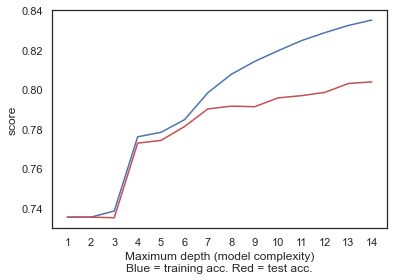

In [89]:
# average performance of the model with different hyperparameters for all the splits (Overfitting and underfitting)
result_set = model_dt_cv.cv_results_
result_set['params']
dd = pd.DataFrame(result_set['params'])
index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==20)])

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_

for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

#### 4. What differences do you observe between these two decision tree models?

**How do they compare performance-wise?**

**a. Test Accuracy**

In [90]:
y_pred_dt = model_dt_df.predict(X_test)
y_pred_dt_cv = model_dt_cv.predict(X_test)

print("Accuracy score on test for DT_default:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for DT_optimal", accuracy_score(y_test, y_pred_dt_cv))

Accuracy score on test for DT_default: 0.7796610169491526
Accuracy score on test for DT_optimal 0.8200782268578879


**b. The Area under an ROC curve (ROC AUC)**

In [91]:
dt_cv_best = model_dt_cv.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on covid19_positive (0 = positive, 1 = negative). Threshold: 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])
    

Probability produced by decision tree for each class vs actual prediction on covid19_positive (0 = positive, 1 = negative). Threshold: 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.20512820512820512 	 0.7948717948717948 	 1
1.0 	 0.0 	 0
0.49206349206349204 	 0.5079365079365079 	 0
0.0 	 1.0 	 1
1.0 	 0.0 	 0
0.47619047619047616 	 0.5238095238095238 	 0
0.0 	 1.0 	 1
0.9259259259259259 	 0.07407407407407407 	 0
0.4146341463414634 	 0.5853658536585366 	 0
0.05405405405405406 	 0.9459459459459459 	 1
0.4146341463414634 	 0.5853658536585366 	 1
0.48 	 0.52 	 0
0.2608695652173913 	 0.7391304347826086 	 0
0.03125 	 0.96875 	 1
0.9473684210526315 	 0.05263157894736842 	 0
0.6 	 0.4 	 0
0.9 	 0.1 	 0
0.0 	 1.0 	 1
0.8888888888888888 	 0.1111111111111111 	 0
0.05405405405405406 	 0.9459459459459459 	 1


**ROC AUC score**

In [92]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model_dt_df.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.7644182591283734
ROC index on test for DT_optimal: 0.8564320430592118


**Plot ROC curve**

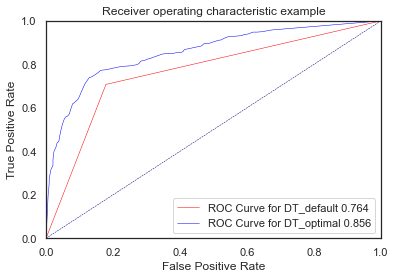

In [93]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

**Produce the ROC curve for both decision trees. Explain why those changes may have happened**


The DT with GridSearchCV (`DT_CV`) shows the largest curve area compared to the DT with default settings (`DT`). Thus `DT_CV` is the best performing model.

In [94]:
import pickle
dt_best = model_dt_cv
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)

#### 5. From the better model, can you identify which patients could potentially be "COVID-19 Positive"?

In [95]:
feature_names = X.columns
n_to_display=15
analyse_feature_importance_cv(model_dt_cv, feature_names,n_to_display)

covid19_symptoms : 0.3084210987347169
income_high : 0.18142813864416216
worried : 0.09872170832815749
risk_mortality : 0.07418205247323051
working_travel critical : 0.056464483643149176
weight : 0.048394950296900816
contacts_count : 0.04404694352001205
race_white : 0.030170628035340447
house_count : 0.030076943984352348
height : 0.020974346338842615
covid19_contact : 0.019029455035011578
working_never : 0.013341742789053453
income_med : 0.01328069835832822
working_stopped : 0.012598122946201901
smoking_never : 0.010283606037229958


---
## 2. Predictive modeling using Regression

#### 1. Pre-processing dataset

The pre-processing dataset followed the same steps performed in decision tree.
Two additional steps were standardization and the handle of outlier. It was identified that ‘weight’, ‘contacts_count’, ‘house_count’, ‘worried’ had some outliers. Variables ‘height’ and ‘risk of mortality’ looked quite normal distributed. Also, it was not included binary variables in this analysis because this type of data may be deemed as categorical variables.

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from project_tools import data_prep
from project_tools import analyse_feature_importance
from project_tools import visualize_decision_tree
from project_tools import analyse_feature_importance_cv
from project_tools import analyse_feature_importance_regression
from project_tools import analyse_feature_importance_regression_cv

# Extend number of columns and rows
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

# set the random seed - consistent
rs = 10

# load the data
df,X,y,X_train, X_test, y_train, y_test = data_prep()

In [97]:
# get target variable
class_var = 'covid19_positive'

print("Number of columns: ", df.shape[1])

# Checking Class Balance
df.groupby(class_var).count()

Number of columns:  55


,height,weight,contacts_count,house_count,worried,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,diabetes,hiv_positive,nursing_home,risk_mortality,sex_female,sex_male,sex_other,age_0_10,age_100_110,age_10_20,age_20_30,age_30_40,age_40_50,age_50_60,age_60_70,age_70_80,age_80_90,age_90_100,income_gov,income_high,income_low,income_med,race_asian,race_black,race_hispanic,race_mixed,race_other,race_white,immigrant_immigrant,immigrant_native,smoking_never,smoking_quit0,smoking_quit10,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,working_home,working_never,working_stopped,working_travel critical,working_travel non critical
covid19_positive,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241
1,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870,1870


In [98]:
df.head(5)

,height,weight,contacts_count,house_count,worried,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,diabetes,hiv_positive,nursing_home,risk_mortality,sex_female,sex_male,sex_other,age_0_10,age_100_110,age_10_20,age_20_30,age_30_40,age_40_50,age_50_60,age_60_70,age_70_80,age_80_90,age_90_100,income_gov,income_high,income_low,income_med,race_asian,race_black,race_hispanic,race_mixed,race_other,race_white,immigrant_immigrant,immigrant_native,smoking_never,smoking_quit0,smoking_quit10,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,working_home,working_never,working_stopped,working_travel critical,working_travel non critical
0,1.100095,80,7.541757,5,4,1,0,0,0,0,0,0,0,0,0,0.194,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.720514,84,7.541757,1,4,1,0,0,0,0,0,0,0,0,0,3.483,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.174331,64,10.000000,1,4,1,0,0,0,0,0,0,0,0,0,0.050,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
3,-3.633488,124,7.541757,10,4,1,0,0,0,0,0,0,0,1,0,13.973,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1.100095,118,7.541757,3,4,1,1,1,1,0,0,0,1,0,0,0.116,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0


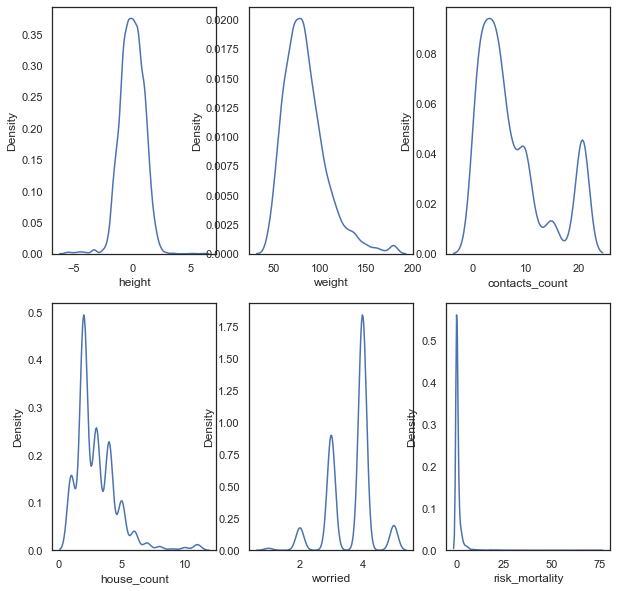

In [99]:
# Verify for outliers
import matplotlib.pyplot as plt
import seaborn as sns

# get columns from X
cols = ['height', 'weight', 'contacts_count', 'house_count', 'worried', 'risk_mortality']

# visualise the columns
fig, ax = plt.subplots(2,3, figsize=(10,10), sharex=False)

# draw distplots on each inspected column in X
for i, col in enumerate(cols):
    sns.distplot(X[col].dropna(), hist=False, ax=ax[int(i/3)][i%3])
    
plt.show()

- Heigh and risk of mortality look like normal distribution without outliers.
- Therefore, it will be applied log to the variables 'weight', 'contactc_count', 'house_count' and 'worried'

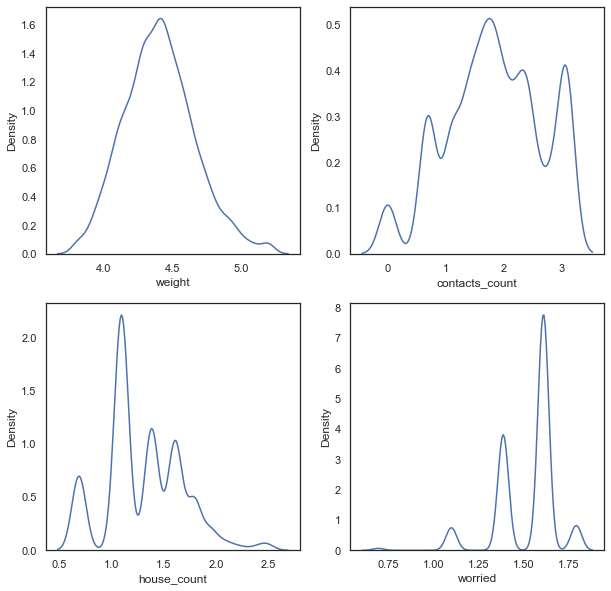

In [100]:
# list columns to be transformed
columns_to_transform = ['weight', 'contacts_count', 'house_count', 'worried']

# copy the dataframe
X_log = X.copy()

# transform the columns with np.log
for col in columns_to_transform:
    X_log[col] = X_log[col].apply(lambda x: x+1)
    X_log[col] = X_log[col].apply(np.log)

# plot them again to show the distribution
fig, ax = plt.subplots(2,2, figsize=(10,10), sharex=False)
for i, col in enumerate(columns_to_transform):
    sns.distplot(X_log[col].dropna(), hist=False, ax=ax[int(i/2)][i%2])
    
plt.show()

##### 2. Build a regression model 

**Default regression**

In [101]:
# start by splitting the data
X_mat_log = X_log.to_numpy()
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log, y, test_size=0.3, stratify=y, random_state=rs)

# scale
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log)
X_test_log = scaler_log.transform(X_test_log)

# fit default model
model_lr_df = LogisticRegression(random_state=rs)
model_lr_df.fit(X_train_log, y_train_log)

# training and test accuracy
print("Train accuracy:", model_lr_df.score(X_train_log, y_train_log))
print("Test accuracy:", model_lr_df.score(X_test_log, y_test_log))
print("")

# classification report on test data
y_pred_log = model_lr_df.predict(X_test_log)
print(classification_report(y_test_log, y_pred_log))

# Feature importance
print("Feature importance:")
feature_names = X.columns
n_to_display=5
analyse_feature_importance_regression(model_lr_df, feature_names,n_to_display)

Train accuracy: 0.798993570030752
Test accuracy: 0.8011734028683182

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       973
           1       0.79      0.63      0.70       561

    accuracy                           0.80      1534
   macro avg       0.80      0.76      0.77      1534
weighted avg       0.80      0.80      0.80      1534

Feature importance:
covid19_symptoms : 0.9704683271280373
income_high : -0.4317331531919625
income_med : 0.4054493705972643
working_travel critical : 0.39912276202915753
covid19_contact : 0.28774952340495175


**Regression model tuned with GridSearchCV**

Train accuracy: 0.7953592395862454
Test accuracy: 0.8011734028683182

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       973
           1       0.80      0.61      0.69       561

    accuracy                           0.80      1534
   macro avg       0.80      0.76      0.77      1534
weighted avg       0.80      0.80      0.79      1534

Total number of models:  10
The optimal value for Regularisation is {'C': 0.01}. After this value the model is stable without changing.


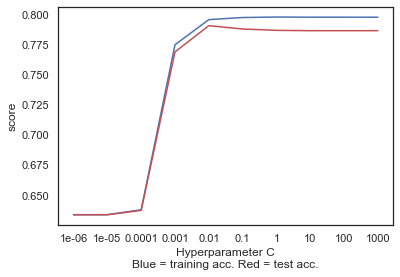

Feature importance:
covid19_symptoms : 0.6928627881486473
income_high : -0.3742980369395639
income_med : 0.3553109309300197
working_travel critical : 0.3192152285177355
covid19_contact : 0.2736106088160057


In [102]:
# start by splitting them again
X_mat_log = X_log.to_numpy()
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log, y, test_size=0.3, stratify=y, random_state=rs)

# scale
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log)
X_test_log = scaler_log.transform(X_test_log)

# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_log, y_train_log))
print("Test accuracy:", cv.score(X_test_log, y_test_log))
print("")

y_pred_log = cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred_log))

# best features
coef = cv.best_estimator_.coef_[0]
feature_names = X_log.columns

import matplotlib.pyplot as plt
# mean train and test score for all the splits.
result_set = cv.cv_results_
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))

# Regularisation strength technique used to prevent overfitting in regression models:
print("The optimal value for Regularisation is " + str(cv.best_params_) + ". After this value the model is stable without changing.")

# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

# Feature importance
print("Feature importance:")
# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:5]

for i in indices:
    print(feature_names[i], ':', coef[i])

In [103]:
# Choose the best model logistic regression
print("Default Model:")
print("Train accuracy:", model_lr_df.score(X_train_log, y_train_log))
print("Test accuracy:", model_lr_df.score(X_test_log, y_test_log))
print("")
print("cv Model:")
print("Train accuracy:", cv.score(X_train_log, y_train_log))
print("Test accuracy:", cv.score(X_test_log, y_test_log))


Default Model:
Train accuracy: 0.798993570030752
Test accuracy: 0.8011734028683182

cv Model:
Train accuracy: 0.7953592395862454
Test accuracy: 0.8011734028683182


In [104]:
# Variables included in the regression model
feature_names = X.columns
feature_names

Index(['height', 'weight', 'contacts_count', 'house_count', 'worried',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'compromised_immune', 'heart_disease', 'diabetes', 'hiv_positive',
       'nursing_home', 'risk_mortality', 'sex_female', 'sex_male', 'sex_other',
       'age_0_10', 'age_100_110', 'age_10_20', 'age_20_30', 'age_30_40',
       'age_40_50', 'age_50_60', 'age_60_70', 'age_70_80', 'age_80_90',
       'age_90_100', 'income_gov', 'income_high', 'income_low', 'income_med',
       'race_asian', 'race_black', 'race_hispanic', 'race_mixed', 'race_other',
       'race_white', 'immigrant_immigrant', 'immigrant_native',
       'smoking_never', 'smoking_quit0', 'smoking_quit10', 'smoking_quit5',
       'smoking_vape', 'smoking_yesheavy', 'smoking_yeslight',
       'smoking_yesmedium', 'working_home', 'working_never', 'working_stopped',
       'working_travel critical', 'working_travel non critical'],
      dtype='object')

#### 3. Build another regression model on the reduced variables set. 


Perform dimensionality reduction with recursive feature elimination. 

Tune the model with GridSearchCV to find the best parameter setting.

Original feature set 54
Number of features after elimination 39

Train accuracy: 0.798154878389712
Test accuracy: 0.8037809647979139

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       973
           1       0.79      0.63      0.70       561

    accuracy                           0.80      1534
   macro avg       0.80      0.77      0.78      1534
weighted avg       0.80      0.80      0.80      1534


Total number of models:  10
The optimal value for Regularisation {'C': 0.1}. After this value the model is stable without changing.


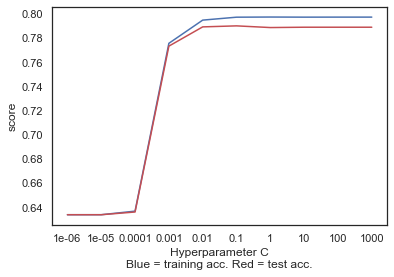

Feature importance:
covid19_symptoms : 0.9267308112629485
age_50_60 : -0.4560218557159109
race_other : 0.38983314373539235


In [105]:
# start by splitting them again
X_mat_log = X_log.to_numpy()
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log, y, test_size=0.3, stratify=y, random_state=rs)

# scale
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log)
X_test_log = scaler_log.transform(X_test_log)

# rfecv model
from sklearn.feature_selection import RFECV
model_lr_rfecv = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
model_lr_rfecv.fit(X_train_log, y_train_log)

# comparing how many variables before and after
print("Original feature set", X_train_log.shape[1])
print("Number of features after elimination", model_lr_rfecv.n_features_)
print("")

# .transform() the original input set taking only the important features.
X_train_sel = model_lr_rfecv.transform(X_train_log)
X_test_sel = model_lr_rfecv.transform(X_test_log)

#fit model
params = {'C': [pow(10, x) for x in range(-6, 4)]}
model_lr_rfecv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), return_train_score=True, 
                      cv=10, n_jobs=-1)
model_lr_rfecv.fit(X_train_sel, y_train_log)

# training and test accuracy
print("Train accuracy:", model_lr_rfecv.score(X_train_sel, y_train_log))
print("Test accuracy:", model_lr_rfecv.score(X_test_sel, y_test_log))
print("")

# classification report on test data
y_pred_log = model_lr_rfecv.predict(X_test_sel)
print(classification_report(y_test_log, y_pred_log))
print("")

import matplotlib.pyplot as plt
result_set = model_lr_rfecv.cv_results_
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))

# Regularisation strength technique used to prevent overfitting in regression models:
print("The optimal value for Regularisation " + str(model_lr_rfecv.best_params_) + ". After this value the model is stable without changing.")

# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

# Feature importance
print("Feature importance:")
feature_names = X_log.columns
n_to_display=3
analyse_feature_importance_regression_cv(model_lr_rfecv, feature_names,n_to_display)

#### 4. Produce the ROC curve for all different regression models.

In [106]:
### Enter your code 
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = model_lr_df.predict_proba(X_test_log)
y_pred_proba_lr_cv = cv.predict_proba(X_test_log)
y_pred_proba_rfe_cv = model_lr_rfecv.predict_proba(X_test_sel)

roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])

print("ROC index on test for `model_lr_df`:", roc_index_lr)
print("ROC index on test for `model_lr_cv`:", roc_index_lr_cv)
print("ROC index on test for `model_lr_rfecv`:", roc_index_rfe_cv)

ROC index on test for `model_lr_df`: 0.8636226236734065
ROC index on test for `model_lr_cv`: 0.8652750832183757
ROC index on test for `model_lr_rfecv`: 0.863109665056343


In [107]:
from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])

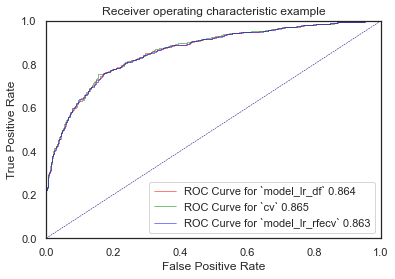

In [108]:
import matplotlib.pyplot as plt
plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model_lr_df` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `model_lr_rfecv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##### Can you identify which patients could potentially be "COVID-19 Positive"? 
##### Can you provide the general characteristics of those patients? If it is hard to comprehend, discuss why? 


In [109]:
# Feature importance
feature_names = X.columns
n_to_display=20
analyse_feature_importance_regression_cv(cv, feature_names,n_to_display)

covid19_symptoms : 0.6928627881486473
income_high : -0.3742980369395639
income_med : 0.3553109309300197
working_travel critical : 0.3192152285177355
covid19_contact : 0.2736106088160057
worried : 0.19446331288255025
weight : 0.18991983383725616
house_count : 0.17511930051361696
working_home : -0.1663248368251866
age_90_100 : 0.13936112917145344
age_60_70 : -0.12967217546696164
height : -0.12666469637668656
nursing_home : 0.12080763759217727
working_travel non critical : -0.1147603165720833
contacts_count : -0.1061770149186473
age_70_80 : -0.102374424747511
working_never : -0.10236970811519712
compromised_immune : 0.08928859259026851
smoking_quit5 : -0.08435735132642969
race_mixed : -0.08431066201611125


In [110]:
### Enter your code
import pickle
lr_best = cv
roc_index_lr_best = roc_index_lr_cv
roc_index_lr_best = roc_index_lr_cv
tpr_lr_best = tpr_lr_cv
fpr_lr_best = fpr_lr_cv
with open('LR.pickle', 'wb') as f:
    pickle.dump([lr_best,roc_index_lr_best, fpr_lr_best, tpr_lr_best], f)

---
## 3. Predictive modeling using Neural Networks

#### 1. Pre-processing dataset
The pre-processing dataset followed the same steps performed in decision tree.
One additional step was the standardization of inputs variables.

In [111]:
# libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from project_tools import data_prep
from project_tools import analyse_feature_importance
from project_tools import visualize_decision_tree
from project_tools import analyse_feature_importance_cv
from project_tools import analyse_feature_importance_regression
from project_tools import analyse_feature_importance_regression_cv

# set the random seed - consistent
rs = 10

# load the data
df,X,y,X_train, X_test, y_train, y_test = data_prep()

In [112]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

#### 2. Build a Neural Network model: Default setting

In [113]:
model_1 = MLPClassifier(random_state=rs)
model_1.fit(X_train, y_train)

MLPClassifier(random_state=10)

This default model does not converge

In [114]:
print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))

Train accuracy: 0.9642158233156276
Test accuracy: 0.7907431551499348


In [115]:
y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_1)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       973
           1       0.71      0.73      0.72       561

    accuracy                           0.79      1534
   macro avg       0.77      0.78      0.78      1534
weighted avg       0.79      0.79      0.79      1534

MLPClassifier(random_state=10)


**a. Explain the parameters used in building this model, e.g., network architecture, iterations, activation function, etc.**

In [116]:
X_train.shape

(3577, 54)

In [117]:
model_1.n_layers_

3

In [118]:
model_1.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

##### Model converge
increasing the number of interaction to 700.

In [119]:
model_2 = MLPClassifier(max_iter=700, random_state=rs)
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(model_2)

Train accuracy: 0.9969247973161868
Test accuracy: 0.7835723598435462
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       973
           1       0.70      0.70      0.70       561

    accuracy                           0.78      1534
   macro avg       0.77      0.77      0.77      1534
weighted avg       0.78      0.78      0.78      1534

MLPClassifier(max_iter=700, random_state=10)


In [120]:
# Number of interactions to converge
model_2.max_iter

700

#### 3. Build a Neural Network model: GridSearchCV

In [121]:
num_features = X_train.shape[1]
num_features

54

In [122]:
# Model: cv_1
params = {'hidden_layer_sizes': [(x,) for x in range(5, 56, 5)]}
cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=MLPClassifier(random_state=10), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(5,), (10,), (15,), (20,),
                                                (25,), (30,), (35,), (40,),
                                                (45,), (50,), (55,)]},
             return_train_score=True)

No converge

In [123]:
#Accuracy
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.8358960022365111
Test accuracy: 0.8102998696219035


In [124]:
# Model: cv_1
params = {'hidden_layer_sizes': [(x,) for x in range(5, 56, 5)]}
cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=400, random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=400, random_state=10),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(5,), (10,), (15,), (20,),
                                                (25,), (30,), (35,), (40,),
                                                (45,), (50,), (55,)]},
             return_train_score=True)

In [125]:
#Parameters
print(cv_1.best_params_)

{'hidden_layer_sizes': (5,)}


In [126]:
#Accuracy
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.8414872798434442
Test accuracy: 0.8057366362451108


Total number of models:  11


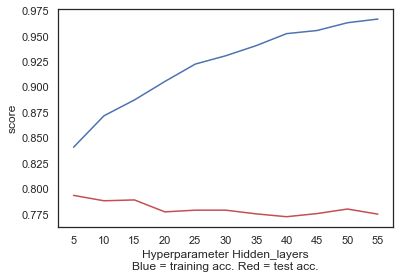

In [127]:
import matplotlib.pyplot as plt
result_set = cv_1.cv_results_
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(5, 56, 5))
plt.ylabel('score')
plt.show()

In [128]:
y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       973
           1       0.76      0.69      0.72       561

    accuracy                           0.81      1534
   macro avg       0.79      0.78      0.79      1534
weighted avg       0.80      0.81      0.80      1534



In [129]:
# Model: cv_2
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)]}
cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=400, random_state=rs), return_train_score=True, cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=400, random_state=10),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(3,), (5,), (7,), (9,)]},
             return_train_score=True)

In [130]:
#Parameters
print(cv_2.best_params_)

{'hidden_layer_sizes': (3,)}


In [131]:
#Accuracy
print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

Train accuracy: 0.8191221694157115
Test accuracy: 0.8076923076923077


In [132]:
y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       973
           1       0.79      0.65      0.71       561

    accuracy                           0.81      1534
   macro avg       0.80      0.77      0.78      1534
weighted avg       0.81      0.81      0.80      1534



Total number of models:  4


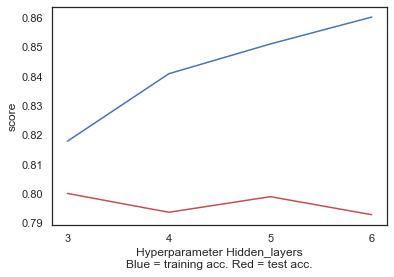

In [133]:
import matplotlib.pyplot as plt
result_set = cv_2.cv_results_
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(3, 7, 1))
plt.ylabel('score')
plt.show()

In [134]:
# Model: cv_3
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}
cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(max_iter=400, random_state=rs), return_train_score=True, cv=10, n_jobs=-1)
cv_3.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(max_iter=400, random_state=10),
             n_jobs=-1,
             param_grid={'alpha': [0.01, 0.001, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(3,), (5,), (7,), (9,)]},
             return_train_score=True)

In [135]:
#Parameters
print(cv_3.best_params_)

{'alpha': 1e-05, 'hidden_layer_sizes': (3,)}


In [136]:
#Accuracy
print("Train accuracy:", cv_3.score(X_train, y_train))
print("Test accuracy:", cv_3.score(X_test, y_test))

Train accuracy: 0.8182834777746715
Test accuracy: 0.8089960886571056


In [137]:
y_pred = cv_3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       973
           1       0.79      0.65      0.71       561

    accuracy                           0.81      1534
   macro avg       0.80      0.78      0.79      1534
weighted avg       0.81      0.81      0.80      1534



Total number of models:  16


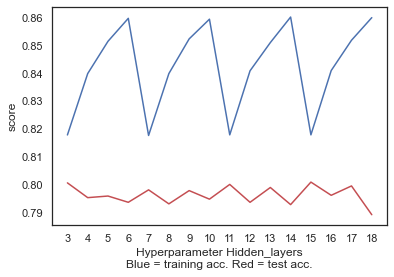

In [138]:
import matplotlib.pyplot as plt
result_set = cv_3.cv_results_
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot hidden layers hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(3, 19, 1))
plt.ylabel('score')
plt.show()

In [139]:
#Accuracy
print("Train accuracy cv_1:", cv_1.score(X_train, y_train))
print("Test accuracy cv_1:", cv_1.score(X_test, y_test))
print("")
print("Train accuracy cv_2:", cv_2.score(X_train, y_train))
print("Test accuracy cv_2:", cv_2.score(X_test, y_test))
print("")
print("Train accuracy cv_3:", cv_3.score(X_train, y_train))
print("Test accuracy cv_3:", cv_3.score(X_test, y_test))

Train accuracy cv_1: 0.8414872798434442
Test accuracy cv_1: 0.8057366362451108

Train accuracy cv_2: 0.8191221694157115
Test accuracy cv_2: 0.8076923076923077

Train accuracy cv_3: 0.8182834777746715
Test accuracy cv_3: 0.8089960886571056


**a.Explain the parameters used in building this model, e.g., network architecture, iterations, activation function, etc.**

In [140]:
cv_3.best_estimator_.get_params()

{'activation': 'relu',
 'alpha': 1e-05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (3,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 400,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

**b.What is the classification accuracy of training and test datasets?**

In [141]:
print("Train accuracy:", cv_3.score(X_train, y_train))
print("Test accuracy:", cv_3.score(X_test, y_test))

Train accuracy: 0.8182834777746715
Test accuracy: 0.8089960886571056


**c.Did the training process converge and result in the best model?**

In [142]:
cv_3.best_estimator_.max_iter

400

#### 4. Build a Neural Network model: reduced feature (decision tree)

In [143]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)

print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 20}


In [144]:
from project_tools import analyse_feature_importance
analyse_feature_importance(dt_best.best_estimator_, X.columns)

covid19_symptoms : 0.3084210987347169
income_high : 0.18142813864416216
worried : 0.09872170832815749
risk_mortality : 0.07418205247323051
working_travel critical : 0.056464483643149176
weight : 0.048394950296900816
contacts_count : 0.04404694352001205
race_white : 0.030170628035340447
house_count : 0.030076943984352348
height : 0.020974346338842615
covid19_contact : 0.019029455035011578
working_never : 0.013341742789053453
income_med : 0.01328069835832822
working_stopped : 0.012598122946201901
smoking_never : 0.010283606037229958
age_30_40 : 0.009398705419679725
age_40_50 : 0.008121276225283672
age_50_60 : 0.00579417522100619
sex_female : 0.0028571742451535286
sex_male : 0.00263558439578298


In [145]:
from sklearn.feature_selection import SelectFromModel
selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)
print(X_train_sel_model.shape)
number_inputs = X_train_sel_model.shape[1]

(3577, 11)


The decision tree model identfies the set of 11 variables as important features. Proceed to tune a MLPClassifier with this modified dataset.

##### Converge

In [146]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=10), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.001, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(3,), (5,), (7,), (9,)]})

In [147]:
print(cv_sel_model.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (3,)}


In [148]:
print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

Train accuracy: 0.8082191780821918
Test accuracy: 0.8018252933507171


In [149]:
y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       973
           1       0.78      0.64      0.70       561

    accuracy                           0.80      1534
   macro avg       0.80      0.77      0.78      1534
weighted avg       0.80      0.80      0.80      1534



In [150]:
# Number of interactions to converge
cv_sel_model.best_estimator_.n_iter_

143

In [151]:
cv_sel_model.best_estimator_.get_params()

{'activation': 'relu',
 'alpha': 0.001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (3,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [152]:
# Reduced feature
feature_names = X.columns
n_to_display=number_inputs
coef = cv_sel_model.best_estimator_.coefs_[0]
coef = coef[:20]
for i in range(len(coef)):
    print(feature_names[i])

height
weight
contacts_count
house_count
worried
covid19_symptoms
covid19_contact
asthma
kidney_disease
compromised_immune
heart_disease


#### 5. Produce the ROC curve for all different NNs. Now, using the best neural network model, can you provide general characteristics of the "COVID-19 Positive" patients identified by the model? If it is hard to comprehend, discuss why?

In [153]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = model_1.predict_proba(X_test)
y_pred_proba_cv_3 = cv_3.predict_proba(X_test)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)

roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_cv_3 = roc_auc_score(y_test, y_pred_proba_cv_3[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])

print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for NN with gridsearch 3:", roc_index_cv_3)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_cv_3, tpr_cv_3, thresholds_cv_3 = roc_curve(y_test, y_pred_proba_cv_3[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

ROC index on test for NN_default: 0.853958849726941
ROC index on test for NN with gridsearch 3: 0.8692532604932097
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.8620443599284056


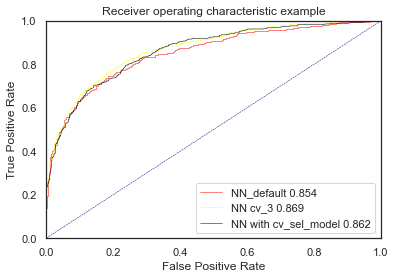

In [154]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_cv_3, tpr_cv_3, label='NN cv_3 {:.3f}'.format(roc_index_cv_3), color='yellow', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [155]:
# feature
feature_names = X.columns
n_to_display=number_inputs
coef = cv_3.best_estimator_.coefs_[0]
coef = coef[:10]
for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

height : [ 0.0682739  -0.01403519  0.31392012]
weight : [-0.10648875 -0.27200327 -0.19307859]
contacts_count : [-0.07468749  0.08433116  0.02451354]
house_count : [ 0.20027483 -0.11092833 -0.08819098]
worried : [ 0.47165873 -0.46128008  0.25975504]
covid19_symptoms : [ 0.9113841  -0.86074616 -0.5342451 ]
covid19_contact : [ 0.36112778 -0.0385294  -0.22810573]
asthma : [-0.05657653 -0.11508197  0.08380954]
kidney_disease : [ 0.08196131 -0.14704993 -0.01136355]
compromised_immune : [ 0.04173818 -0.16084786 -0.07776583]


---
### Final remarks: Decision making

#### 1. Finally, based on all models and analysis, is there a model you will use in decision making? Justify your choice. Draw a ROC chart and Accuracy Table to support your findings.

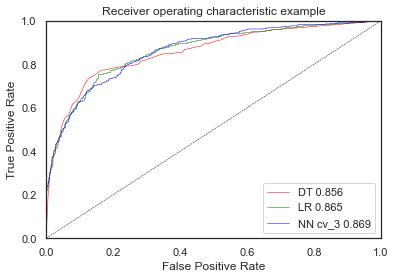

In [156]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
with open('LR.pickle', 'rb') as f:
    lr_best,roc_index_lr_cv, fpr_lr_cv, tpr_lr_cv = pickle.load(f)   
    

plt.plot(fpr_dt_cv, tpr_dt_cv, label='DT {:.3f}'.format(roc_index_dt_cv), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='LR {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN cv_3 {:.3f}'.format(roc_index_cv_3), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show() 

There are numerous technical factors that can be considered to select a model, such as usability, fast training, prone to overfitting. However, due to the fact that the purpose of this analysis is to predict if a patient is positive covid 19, the accuracy and ROC index of the model must be the most key performance indicators. For example, if there was a wrong prediction of patient being covid 19, they could be affected by taking the erroneous medicine or be isolated. Moreover, authorities, who could use this model of prediction, would take failed decision that could cause panic in the citizens. Hence, it is crucial that the model perform with the best precision.

According to the ROC curve, the best model would be cv3 (fine-tuned model) and the model with the best test accuracy would be the model_dt_cv (decision tree). Accuracy is preferably used when the data is balanced, but this dataset is unbalanced due to the fact that the prediction is classified positive (1) and negative (0) covid. Hence, the model nn_cv_3 will be selected as the best model to predict patient with positive Covid 19

---
### Conclusion

- Decision tree. The manipulation of parameters to obtain the best performance of model was easy due to the fast-training process. The model was easy to interpret because the tree image was clear to determine the importance of each variable in patient with Covid 19. The data did not request to be standardized and remove potential outliers. Reduction of features is also another positive advantage, which was useful to implement in neural network. The negative aspect would be that the model is prone to overfitting. As it was seen in Figure c1-2, when the training process was longer, the variance between train and test increased, causing that the model could lead to low accuracy.

- Logistic regression. The process of training and test was fast. It is possible to find a satisfactory performance and accuracy of the model. The correlation of coefficients (linear regression) allows us to analyse the importance of the variables (weight) in order to determine positive and negative correlation between covid19_positive and inputs variables. The negative aspect is that the model could be affected by outliers; therefore, it was requested to transform skewed data using log transformation in this analysis.

- Neural network. The process of training is slow. In order to find the proper number of hidden layers and alpha values was spent much time. Furthermore, an incorrect decision of number of layers can cause overfitting of the model. the interpretation of results (black-box) is harder, but there are some new techniques (Lime) outside the scope of this unit which could allow to analyse the probability of each variable affecting the classification of patients being positive Covid 19. The positive advantage is that neural network may find the best combination of variables and neurons to predict classification tasks. Furthermore, it was not necessary to remove empty or noise value.